# **Mall Customer Segmentation and Analysis by K-Means Clustering**

**1-Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

**2-Getting Data**

In [2]:
df=pd.read_csv('datasets_42674_74935_Mall_Customers.csv')

In [3]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


**3-Data Cleaning**

*3-1- Renaming columns*

In [42]:
df.columns=['CustomerID', 'Gender', 'Age', 'Annual Income','Spending Score']

In [43]:
df.head(2)

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81


*3-2- Checking null values*

In [6]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

**4- Data Visualization**

*4-1- Distribution of Age, Annual Income andSpending Score values* 

Text(0.5, 1.0, 'Distplot of Spending Score')

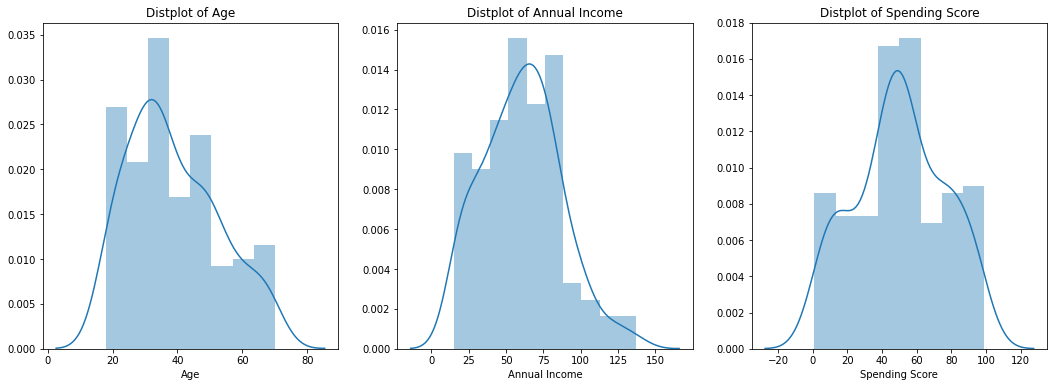

In [46]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.distplot(df['Age'])
plt.title('Distplot of Age')

plt.subplot(1,3,2)
sns.distplot(df['Annual Income'])
plt.title('Distplot of Annual Income')

plt.subplot(1,3,3)
sns.distplot(df['Spending Score'])
plt.title('Distplot of Spending Score')

*4-2- Distribution of values of Age, Annual Income and Spending Score according to Gender*

([], [])

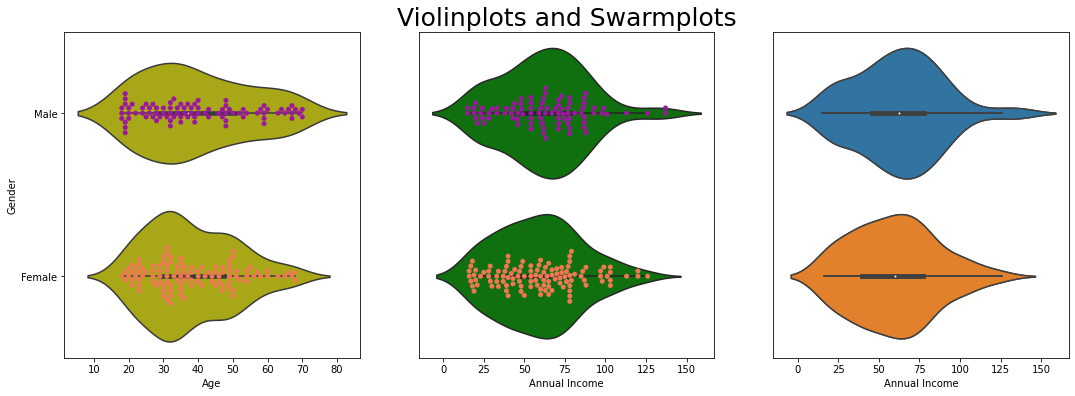

In [58]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.violinplot(x='Age', y='Gender', data=df,color='y')
sns.swarmplot(x='Age', y='Gender', data=df,palette='plasma')

plt.subplot(1,3,2)
sns.violinplot(x='Annual Income', y='Gender', data=df,color='g')
sns.swarmplot(x='Annual Income', y='Gender', data=df,palette='plasma')
plt.ylabel(' ')
plt.yticks([])
plt.title('Violinplots and Swarmplots',fontsize=25)


plt.subplot(1,3,3)
sns.violinplot(x='Annual Income', y='Gender', data=df)
sns.violinplot(x='Annual Income', y='Gender', data=df)
plt.ylabel(' ')
plt.yticks([])

*4-3- Count Plot of Gender*

Text(0.5, 1.0, 'Count Plot of Gender')

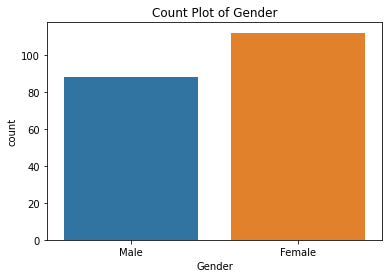

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Count Plot of Gender')

*4-4- The Relationship between Age, Annual Income and Spending Score*

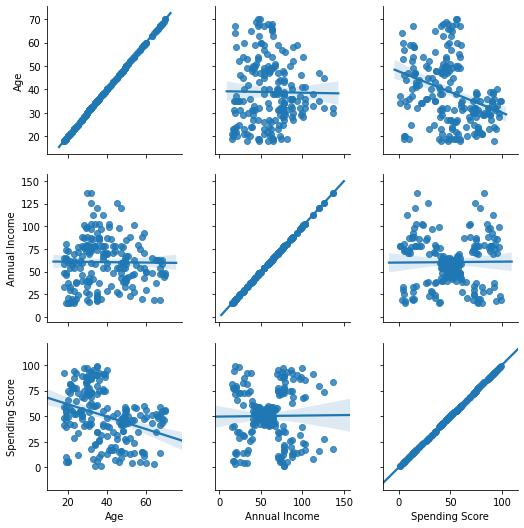

In [56]:
new=sns.PairGrid(df.drop('CustomerID',axis=1))
new.map(sns.regplot)

*4-5- The Relationship between Age, Annual Income and Gender*

Text(0.5, 1.0, 'Age vs Annual Income vs Gender')

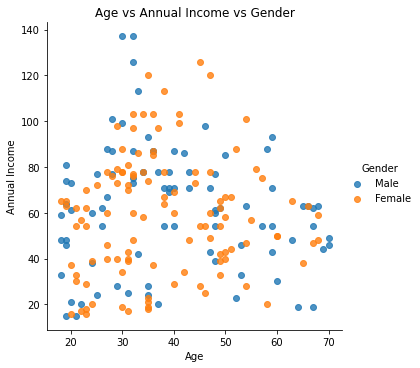

In [57]:
sns.lmplot(x='Age', y='Annual Income', data=df,fit_reg=False, hue='Gender')
plt.title('Age vs Annual Income vs Gender')

*4-6- The Relationship between Annual Income, Spending Score and Gender*

Text(0.5, 1.0, 'Annual Income vs Spending Score vs Gender')

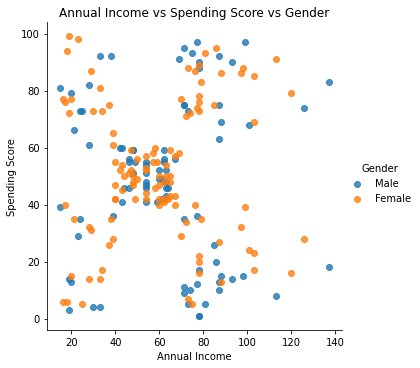

In [60]:
sns.lmplot(x='Annual Income', y='Spending Score', data=df,fit_reg=False, hue='Gender')
plt.title('Annual Income vs Spending Score vs Gender')

**5- Clustering using K Means Clustering**

*5-1- Segmentation using Age and Spending Score*

In [61]:
X1=df[['Age','Spending Score']]
inertia1=[]
for n in range(1 , 11):
    model1=KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
    model1.fit(X1)
    inertia1.append(model1.inertia_)
print(inertia1)

[171535.5, 75949.15601023017, 45840.67661610867, 28165.58356662934, 23839.439633173846, 19576.013221355326, 15514.19313435103, 13020.333585858585, 11480.045478271728, 10187.846101364521]


Text(0, 0.5, 'Inertia')

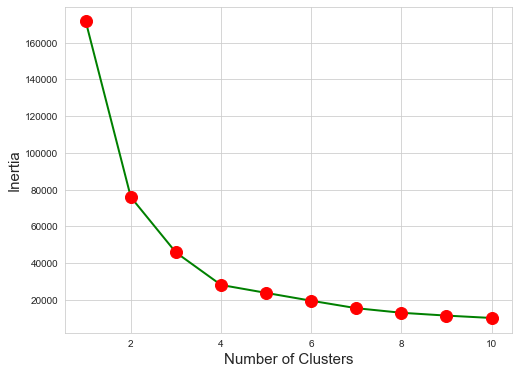

In [91]:
plt.figure(figsize=(8,6))
plt.plot(list(range(1 , 11)), inertia1, color='green', marker='o',linewidth=2, markersize=12, markerfacecolor='red', markeredgecolor='red')
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)

In [64]:
model1=KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
model1.fit(X1)
labels1=model1.labels_
centroids1=model1.cluster_centers_

Text(0, 0.5, 'Spending Score')

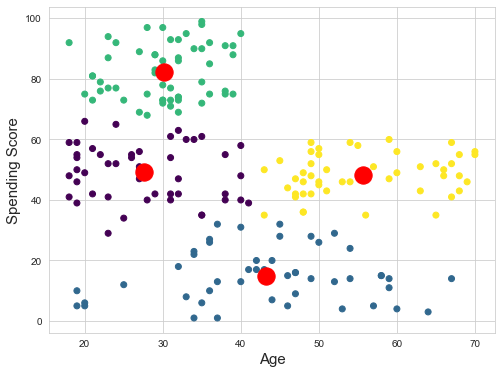

In [68]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.scatter(x=df['Age'], y=df['Spending Score'],c=labels1,cmap='viridis')
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1], s = 300 , c = 'red')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Spending Score',fontsize=15)

*5-2- Segmentation using Annual Income and Spending Score*

In [71]:
X2=df[['Annual Income','Spending Score']]
inertia2=[]
for n in range(1,11):
    model2=KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
    model2.fit(X2)
    inertia2.append(model2.inertia_)  
print(inertia2)

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37239.83554245604, 30259.65720728547, 25018.78161341407, 21862.092672182887, 19664.685196005543]


Text(0, 0.5, 'Inertia')

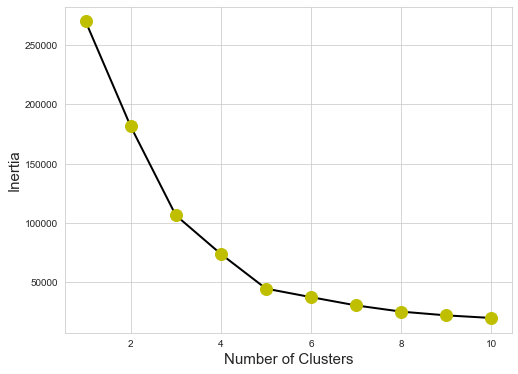

In [92]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.plot(list(range(1,11)),inertia2,color='black', marker='o',linewidth=2, markersize=12, markerfacecolor='y', markeredgecolor='y')
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)

In [73]:
model2=KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
model2.fit(X2)
centroids2=model2.cluster_centers_
labels2=model2.labels_

Text(0, 0.5, 'Spending Score')

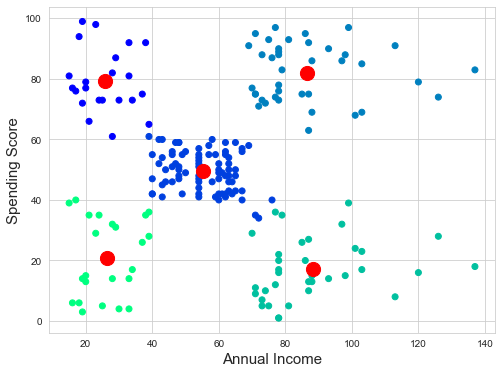

In [74]:
plt.figure(figsize=(8,6))

sns.set_style('whitegrid')
plt.scatter(x=df['Annual Income'], y=df['Spending Score'],c=labels2,cmap='winter')
plt.scatter(centroids2[:,0], centroids2[:,1],c='red',s=200)
plt.xlabel('Annual Income',fontsize=15)
plt.ylabel('Spending Score',fontsize=15)

*5-3- Segmentation using Age, Annual Income and Spending Score*

In [75]:
X3=df[['Age', 'Annual Income', 'Spending Score']]
inertia3=[]
for n in range (1,10):
    model3=KMeans(n_clusters=n,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
    model3.fit(X3)
    inertia3.append(model3.inertia_)
print(inertia3)

[308812.78, 212840.16982097185, 143342.751571706, 104366.15145556198, 75493.84464013916, 58300.44332159069, 51153.283015839996, 44344.280380430384, 40622.67755719132]


Text(0, 0.5, 'Inertia')

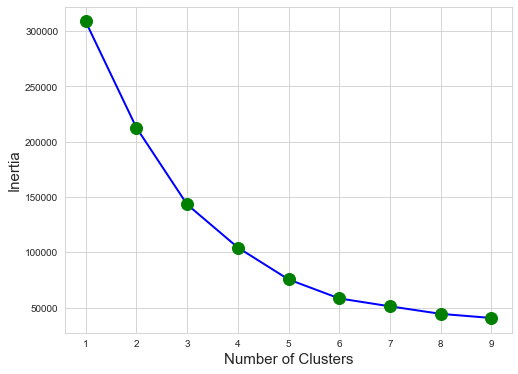

In [94]:
plt.figure(figsize=(8,6))
plt.plot(list(range (1,10)),inertia3, color='b',marker='o', linewidth=2, markersize=12, markerfacecolor='g', markeredgecolor='g')
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)

In [79]:
model3=KMeans(n_clusters=6,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
model3.fit(X3)
centroids3=model3.cluster_centers_
labels3=model3.labels_

In [61]:
px.scatter_3d(data_frame=df,x='Age',y='Annual Income',z='Spending Score',color=labels3)

*5-4- Segmentation using Age, Annual Income and Spending Score*

In [80]:
lb=LabelEncoder()

In [81]:
lb.fit(df['Gender'])

LabelEncoder()

In [82]:
df['Gender']=lb.transform(df['Gender'])

In [84]:
df.head(2)

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,1,19,15,39
1,2,1,21,15,81


In [85]:
X4=df[['Gender', 'Age' , 'Annual Income']]
inertia4=[]
for n in range (1,10):
    model4=KMeans(n_clusters=n,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
    model4.fit(X4)
    inertia4.append(model4.inertia_)
print(inertia4)

[176158.06, 87170.74887218044, 59535.81464767616, 39578.48772507481, 31699.66786170818, 25447.381711066373, 21921.395334828318, 18946.326932770986, 16111.371792755936]


Text(0, 0.5, 'Inertia')

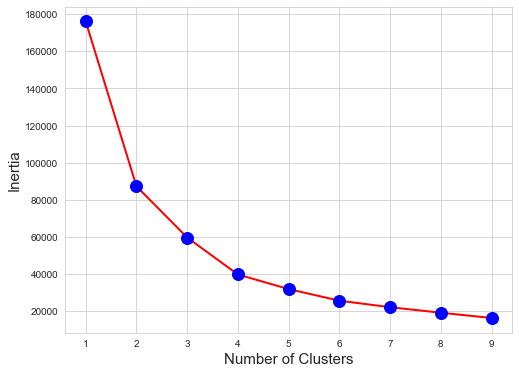

In [95]:
plt.figure(figsize=(8,6))
plt.plot(list(range (1,10)),inertia4, color='r',marker='o', linewidth=2, markersize=12, markerfacecolor='b', markeredgecolor='b')
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)

In [71]:
model4=KMeans(n_clusters=5,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
model4.fit(X4)
centroids4=model4.cluster_centers_
labels4=model4.labels_

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

In [76]:
px.scatter_3d(data_frame=df,x='Gender', y='Age' , z='Annual Income',color=labels4)